In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
import spacy

In [ ]:
#!pip install contextualSpellCheck

In [ ]:
import contextualSpellCheck

In [ ]:
#!pip install autocorrect

In [ ]:
from autocorrect import Speller

In [ ]:
from spacy.matcher import Matcher

In [ ]:
df = pd.read_csv('restaurant_reviews_anonymized.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Restaurant,Review,Real,Reviewer,F1-AWL,F2-PAU,F3-ANP,F4-ASL,F5-NCL,F6-NWO,...,F13-LXD,F14-NMV,F15-NTY,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Rose Restaurant,Great food and great atmosphere! The chicken t...,0,3,4.465909,1.000000,14.250000,17.600000,5,88,...,0.795181,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rose Restaurant,I had heard good things about Rose Restaurant ...,0,3,3.838983,1.500000,10.000000,19.666667,6,118,...,0.752294,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rose Restaurant,I was driving by rose restaurant one day and d...,0,3,3.377049,1.142857,8.923077,17.428571,7,122,...,0.675439,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rose Restaurant,Rose Restaurant had the most modern and up-to-...,0,3,4.044118,1.750000,17.500000,17.000000,4,68,...,0.819672,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gloria Restaurant,Today is the third time I've come to Gloria Re...,0,3,4.071429,1.500000,10.700000,14.000000,6,84,...,0.786667,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing

In [ ]:
new_data = []

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
for line in df['Review']:
    a = re.sub('[^a-zA-Z]', ' ', line).lower()
    word_tokens = word_tokenize(a)
    filtered = [w for w in word_tokens if not w in stop_words]
    new_data.append(' '.join(filtered))

In [ ]:
new_data[:5]

['great food great atmosphere chicken tikka masala garlic naan tasted come straight india pleased entr e ended ordering gulab jamun desert mango lassi beverage nothing pleased also employees management attentive made sure everything needed beginning end manager matt personally came around even check experience',
 'heard good things rose restaurant decided go ahead give restaurant try atmosphere expecting walking front door felt trying way hard modern rather indian cashier took orders polite however asked make food mild must listening food brought waiting minutes spicy could barely take flavor paneer masala overall disappointed experience',
 'driving rose restaurant one day decided give try lunch break familiar indian food option try born lubbock however glad know tikka kabobs way spicy know mistake food spicy sides rice dish gave also burned edges making hard even want eat coming establishment',
 'rose restaurant modern date atmosphere restaurant period first time trying indian food pl

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(new_data)]

In [ ]:
tagged_data[:2]

[TaggedDocument(words=['great', 'food', 'great', 'atmosphere', 'chicken', 'tikka', 'masala', 'garlic', 'naan', 'tasted', 'come', 'straight', 'india', 'pleased', 'entr', 'e', 'ended', 'ordering', 'gulab', 'jamun', 'desert', 'mango', 'lassi', 'beverage', 'nothing', 'pleased', 'also', 'employees', 'management', 'attentive', 'made', 'sure', 'everything', 'needed', 'beginning', 'end', 'manager', 'matt', 'personally', 'came', 'around', 'even', 'check', 'experience'], tags=['0']),
 TaggedDocument(words=['heard', 'good', 'things', 'rose', 'restaurant', 'decided', 'go', 'ahead', 'give', 'restaurant', 'try', 'atmosphere', 'expecting', 'walking', 'front', 'door', 'felt', 'trying', 'way', 'hard', 'modern', 'rather', 'indian', 'cashier', 'took', 'orders', 'polite', 'however', 'asked', 'make', 'food', 'mild', 'must', 'listening', 'food', 'brought', 'waiting', 'minutes', 'spicy', 'could', 'barely', 'take', 'flavor', 'paneer', 'masala', 'overall', 'disappointed', 'experience'], tags=['1'])]

## Feature extractions

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
spell = Speller(lang='en')

In [ ]:
avg_word_length = []
pausality = []
avg_np = []
avg_sent_length = []
num_clauses = []
num_words = []
num_verbs = []
num_adj = []
num_pv = []
emotiveness = []
content_div = []
redundancy = []
lexical_div = []
num_mv = []
num_typos = []

In [ ]:
for i in range(len(df)):
    doc = nlp(df['Review'][i].replace('\r', ''))
    n_adj = 0
    n_verbs = 0
    n_nouns = 0
    n_adv = 0
    n_passive = 0
    n_mv = 0
    n_cl = 0
    n_punc = 0
    redun = 0
    n_typos = 0

    for token in doc:
        if token.pos_ == 'ADJ':
            n_adj += 1
        elif token.pos_ == 'VERB':
            n_verbs += 1
        elif token.pos_ == 'NOUN':
            n_nouns += 1
        elif token.pos_ == 'ADV':
            n_adv += 1
        if token.dep_ == 'aux' and token.tag_ == 'MD':
            #print(token)
            n_mv += 1
        if token.dep_ == 'nsubjpass':
            #print(token)
            n_passive += 1
        elif token.dep_ == 'ROOT':
            #print(token)
            n_cl += 1
        if token.is_punct == True:
            n_punc += 1

    words = [token.text.lower() for token in doc if token.is_punct == False]
    len_words = 0

    filtered = []

    for word in words:
        len_words += len(word)
        if spell(word) != word:
            n_typos += 1
        if not word in stop_words:
            filtered.append(word)

    avg_wl = len_words/len(words)

    avg_sl = len(doc)/len(list(doc.sents)) 

    emo = (n_adj + n_adv)/(n_nouns + n_verbs)

    lxd = len(set(words))/len(words)

    cdv = len(set(filtered))/len(words)

    len_chunk = 0
    for chunk in doc.noun_chunks:
        len_chunk += len(chunk)
    anp = len_chunk/len([chunk.text for chunk in doc.noun_chunks])    

    redun = (len(words) - len(filtered))/len(list(doc.sents))


    avg_word_length.append(avg_wl)
    pausality.append(n_punc/len(list(doc.sents)))
    avg_np.append(anp)
    avg_sent_length.append(avg_sl)
    num_clauses.append(n_cl)
    num_words.append(len(words))
    num_verbs.append(n_verbs)
    num_adj.append(n_adj)
    num_pv.append(n_passive)
    emotiveness.append(emo)
    content_div.append(cdv)
    redundancy.append(redun)
    lexical_div.append(lxd)
    num_mv.append(n_mv)
    num_typos.append(n_typos)


In [ ]:
# print('Av WL:', avg_wl,'\nPausality:', pausality, '\naverage NP:', anp,'\nSL:', avg_sl,'\nCl:', n_cl,'\nWords:', len(words), '\nVerbs:', n_verbs,
#       '\nAdj:', n_adj,'\nPassive:', n_passive, '\nEmo:', emo,'\nCDV:', cdv,'\nRedun:', redun, '\nLXD:', lxd, '\nMV:',n_mv, '\nTypos:', n_typos)

## Embedding

In [ ]:
max_epochs = 500
alpha = 0.025

model = Doc2Vec(vector_size=110, alpha=alpha, min_alpha=0.00025, min_count=1, dm=1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    model.alpha -= 0.0002
    model.min_alpha = model.alpha


In [ ]:
X = model.docvecs
y = df['Real']

<ipython-input-28-5235d0211be5>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  X = model.docvecs


### Decision tree

In [ ]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
acc_scores_dt = cross_val_score(model_dt, X, y, cv=10)
f1_scores_dt = cross_val_score(model_dt, X, y, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_dt.mean(), '\nF1: ', f1_scores_dt.mean())

Accuracy:  0.6090909090909091 
F1:  0.550003885003885


### Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=827, criterion='entropy', max_depth=4)
acc_scores_rf = cross_val_score(model_rf, X, y, cv=10)
f1_scores_rf = cross_val_score(model_rf, X, y, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_rf.mean(), '\nF1: ', f1_scores_rf.mean())

Accuracy:  0.6272727272727272 
F1:  0.6506726606726606


### Support Vector Machine

In [ ]:
model_svm = SVC(kernel='rbf', C=21.832, degree=6, gamma='scale')
acc_scores_svm = cross_val_score(model_svm, X, y, cv=10)
f1_scores_svm = cross_val_score(model_svm, X, y, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_svm.mean(), '\nF1: ', f1_scores_svm.mean())

Accuracy:  0.6818181818181819 
F1:  0.6828144078144078


### Extreme Gradient Boosting Trees

In [ ]:
l = []
for i in range(110):
    l.append(list(X[i]))
l = np.reshape(l, (110, 110))

In [ ]:
model_xgb = XGBClassifier(n_estimators=421, max_depth=3, gamma=9.08, alpha=0.035)
acc_scores_xgb = cross_val_score(model_xgb, l, y, cv=10)
f1_scores_xgb = cross_val_score(model_xgb, l, y, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_xgb.mean(), '\nF1: ', f1_scores_xgb.mean())

Accuracy:  0.48181818181818176 
F1:  0.5201437451437452


### Multilayer perceptron

In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes=(35, 40, 20, 5), activation='relu', max_iter=1000)
acc_scores_mlp = cross_val_score(model_mlp, X, y, cv=10)
f1_scores_mlp = cross_val_score(model_mlp, X, y, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_mlp.mean(), '\nF1: ', f1_scores_mlp.mean())

Accuracy:  0.6545454545454545 
F1:  0.6035347985347986


In [ ]:
print('Accuracy DT: ', acc_scores_dt.mean(), '\nF1 DT: ', f1_scores_dt.mean())
print('Accuracy RF: ', acc_scores_rf.mean(), '\nF1 RF: ', f1_scores_rf.mean())
print('Accuracy SVM: ', acc_scores_svm.mean(), '\nF1 SVM: ', f1_scores_svm.mean())
print('Accuracy XGB: ', acc_scores_xgb.mean(), '\nF1 XGB: ', f1_scores_xgb.mean())
print('Accuracy MLP: ', acc_scores_mlp.mean(), '\nF1 MLP: ', f1_scores_mlp.mean())

Accuracy DT:  0.6090909090909091 
F1 DT:  0.550003885003885
Accuracy RF:  0.6272727272727272 
F1 RF:  0.6506726606726606
Accuracy SVM:  0.6818181818181819 
F1 SVM:  0.6828144078144078
Accuracy XGB:  0.48181818181818176 
F1 XGB:  0.5201437451437452
Accuracy MLP:  0.6545454545454545 
F1 MLP:  0.6035347985347986


## Feature significance

In [ ]:
columns = ['Average word length', 'Pausality', 'Average NP length', 'Average sentence length', 'Number of clauses', 'Number of words', 'Number of verbs', 
           'Number of adjectives', 'Number of passive voice', 'Emotiveness', 'Content diversity', 'Redundancy', 'Lexical diversity', 'Number of modal verbs', 'Number of typos']

In [ ]:
df_features = pd.DataFrame(list(zip(avg_word_length, pausality, avg_np, avg_sent_length, num_clauses, num_words, num_verbs, 
                                    num_adj, num_pv, emotiveness, content_div, redundancy, lexical_div, num_mv, num_typos)), columns = columns)

In [ ]:
model_fs = RandomForestClassifier()
model_fs.fit(df_features, df['Real'])

RandomForestClassifier()

In [ ]:
fs = model_fs.feature_importances_

In [ ]:
fs_dict = {columns[i]: fs[i] for i in range(len(fs))}

In [ ]:
for i in sorted(fs_dict, key=fs_dict.get, reverse=True):
    print(i,':', fs_dict[i])

Pausality : 0.10521853776863452
Content diversity : 0.09749275069172597
Number of adjectives : 0.0941131059212881
Redundancy : 0.09152483630441215
Number of words : 0.08934610119821473
Average sentence length : 0.08743483189600619
Lexical diversity : 0.08229227022776474
Average NP length : 0.07959713706298592
Number of clauses : 0.06305894666342177
Emotiveness : 0.06046339349287348
Average word length : 0.051619992271540155
Number of verbs : 0.046768102790452744
Number of typos : 0.02807901960490517
Number of modal verbs : 0.016567881212091393
Number of passive voice : 0.00642309289368305


In [ ]:
corr_mat = df_features.corr()

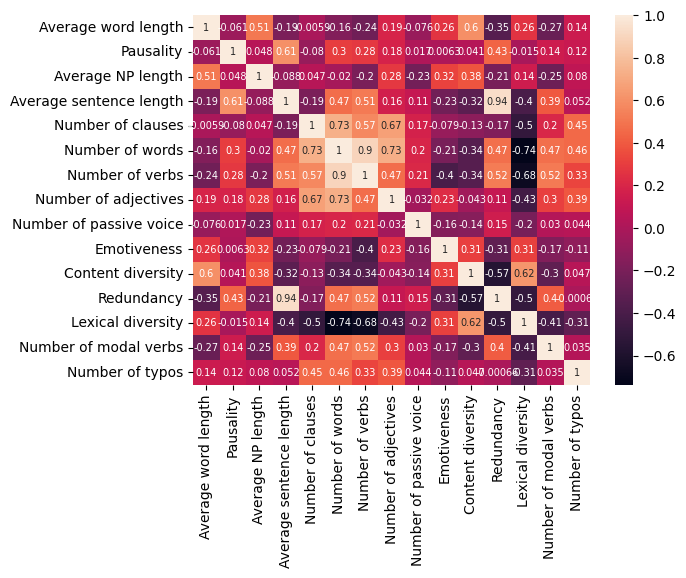

In [ ]:
sn.heatmap(corr_mat, annot=True, annot_kws={"size": 7})
plt.show()

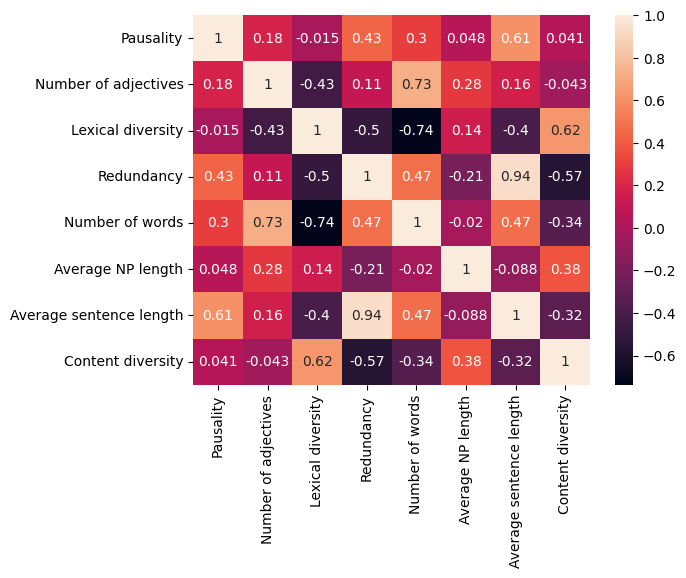

In [ ]:
sn.heatmap(df_features[['Pausality', 'Number of adjectives', 'Lexical diversity', 'Redundancy', 'Number of words', 'Average NP length', 'Average sentence length', 'Content diversity']].corr(), annot=True, annot_kws={"size": 10})
plt.show()

## Feature elimination

In [ ]:
rfecv = RFECV(estimator=RandomForestClassifier())

In [ ]:
model_fe = RandomForestClassifier()

In [ ]:
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(df_features, df['Real'], test_size = 0.1)

In [ ]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model_fe)])
cv = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(pipeline, X_train_fe, y_train_fe, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.6877777777777777

In [ ]:
for (train, test), i in zip(cv.split(df_features, df['Real']), range(10)):
    pipeline.fit(X_train_fe, y_train_fe)

In [ ]:
print(rfecv.n_features_)

15


In [ ]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=df_features.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df

,Rank
Average word length,1
Pausality,1
Average NP length,1
Average sentence length,1
Number of clauses,1
Number of words,1
Number of verbs,1
Number of adjectives,1
Number of passive voice,1
Emotiveness,1


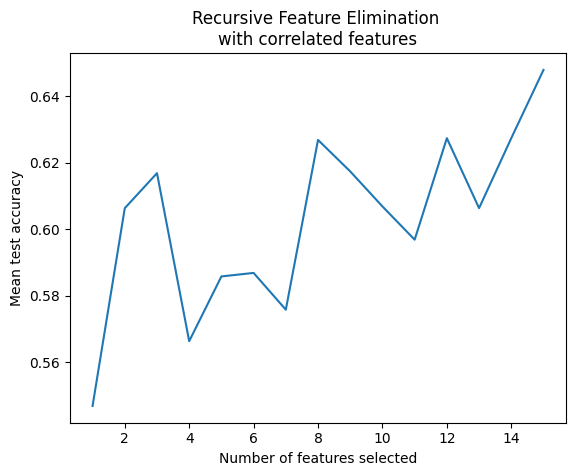

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

## Experimneting

In [ ]:
df_f1 = df_features[['Pausality', 'Number of adjectives', 'Lexical diversity']]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_f1, df['Real'], test_size = 0.33)

### Decision tree + features

In [ ]:
model_dt_f = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
acc_scores_dt_f = cross_val_score(model_dt_f, X_train1, y_train1, cv=10)
f1_scores_dt_f = cross_val_score(model_dt_f, X_train1, y_train1, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_dt_f.mean(), '\nF1: ', f1_scores_dt_f.mean())

Accuracy:  0.6196428571428572 
F1:  0.5277777777777779


In [ ]:
cv = StratifiedKFold(n_splits=10)
for (train, test), i in zip(cv.split(X_train1, y_train1), range(10)):
    model_dt_f.fit(X_train1, y_train1)

In [ ]:
y_pred_dt_f = model_dt_f.predict(X_test1)

accuracy_dt_f = accuracy_score(y_test1, y_pred_dt_f)
f1_dt_f = f1_score(y_test1, y_pred_dt_f, average='weighted')
print('Test accuracy: ', accuracy_dt_f, '\nTest F1: ', f1_dt_f)

Test accuracy:  0.6486486486486487 
Test F1:  0.6181926607458522


### Random Forest + features

In [ ]:
model_rf_f = RandomForestClassifier(n_estimators=827, criterion='entropy', max_depth=4)
acc_scores_rf_f = cross_val_score(model_rf_f, X_train1, y_train1, cv=10)
f1_scores_rf_f = cross_val_score(model_rf_f, X_train1, y_train1, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_rf_f.mean(), '\nF1: ', f1_scores_rf_f.mean())

Accuracy:  0.6964285714285714 
F1:  0.595


In [ ]:
cv = StratifiedKFold(n_splits=10)
for (train, test), i in zip(cv.split(X_train1, y_train1), range(10)):
    model_rf_f.fit(X_train1, y_train1)

In [ ]:
y_pred_rf_f = model_rf_f.predict(X_test1)

accuracy_rf_f = accuracy_score(y_test1, y_pred_rf_f)
f1_rf_f = f1_score(y_test1, y_pred_rf_f, average='weighted')
print('Test accuracy: ', accuracy_rf_f, '\nTest F1: ', f1_rf_f)

Test accuracy:  0.7567567567567568 
Test F1:  0.7564003564003563


### Support Vector Machine + features

In [ ]:
model_svm_f = SVC(kernel='rbf', C=21.832, degree=6, gamma='scale')
acc_scores_svm_f = cross_val_score(model_svm_f, X_train1, y_train1, cv=10)
f1_scores_svm_f= cross_val_score(model_svm_f, X_train1, y_train1, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_svm_f.mean(), '\nF1: ', f1_scores_svm_f.mean())

Accuracy:  0.5874999999999999 
F1:  0.5014285714285714


In [ ]:
cv = StratifiedKFold(n_splits=10)
for (train, test), i in zip(cv.split(X_train1, y_train1), range(10)):
    model_svm_f.fit(X_train1, y_train1)

In [ ]:
y_pred_svm_f = model_svm_f.predict(X_test1)

accuracy_svm_f = accuracy_score(y_test1, y_pred_svm_f)
f1_svm_f = f1_score(y_test1, y_pred_svm_f, average='weighted')
print('Test accuracy: ', accuracy_svm_f, '\nTest F1: ', f1_svm_f)

Test accuracy:  0.7837837837837838 
Test F1:  0.7834676782045203


### Extreme Gradient Boosting Trees

In [ ]:
model_xgb_f = XGBClassifier(n_estimators=421, max_depth=3, gamma=9.08, alpha=0.035)
acc_scores_xgb_f = cross_val_score(model_xgb_f, X_train1, y_train1, cv=10)
f1_scores_xgb_f = cross_val_score(model_xgb_f, X_train1, y_train1, cv=10, scoring='f1')

In [ ]:
print('Accuracy: ', acc_scores_xgb_f.mean(), '\nF1: ', f1_scores_xgb_f.mean())

Accuracy:  0.5071428571428571 
F1:  0.0


In [ ]:
cv = StratifiedKFold(n_splits=10)
for (train, test), i in zip(cv.split(X_train1, y_train1), range(10)):
    model_xgb_f.fit(X_train1, y_train1)

In [ ]:
y_pred_xgb_f = model_xgb_f.predict(X_test1)

accuracy_xgb_f = accuracy_score(y_test1, y_pred_xgb_f)
f1_xgb_f = f1_score(y_test1, y_pred_xgb_f, average='weighted')
print('Test accuracy: ', accuracy_xgb_f, '\nTest F1: ', f1_xgb_f)

Test accuracy:  0.4864864864864865 
Test F1:  0.3184275184275185


### Multilayer perceptron + features

In [ ]:
model_mlp_f = MLPClassifier(hidden_layer_sizes=(35, 40, 20, 5), activation='relu', max_iter=1000)
acc_scores_mlp_f = cross_val_score(model_mlp_f, X_train1, y_train1, cv=10)
f1_scores_mlp_f = cross_val_score(model_mlp_f, X_train1, y_train1, cv=10, scoring='f1')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('Accuracy: ', acc_scores_mlp_f.mean(), '\nF1: ', f1_scores_mlp_f.mean())

Accuracy:  0.575 
F1:  0.40349206349206346


In [ ]:
cv = StratifiedKFold(n_splits=10)
for (train, test), i in zip(cv.split(X_train1, y_train1), range(10)):
    model_mlp_f.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred_mlp_f = model_mlp_f.predict(X_test1)

accuracy_mlp_f = accuracy_score(y_test1, y_pred_mlp_f)
f1_mlp_f = f1_score(y_test1, y_pred_mlp_f, average='weighted')
print('Test accuracy: ', accuracy_mlp_f, '\nTest F1: ', f1_mlp_f)

Test accuracy:  0.7837837837837838 
Test F1:  0.7828298887122417
